# California House Price Prediction

## Importing Necessary Libraries/Modules

In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

## Loading the Dataset

In [194]:
df = pd.read_csv("housing.csv")

## Data Exploration

In [195]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [196]:
df.shape

(20640, 10)

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [198]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Data Cleaning

In [248]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [199]:
df.dropna(inplace=True)

In [200]:
df.shape

(20433, 10)

## Splitting the Dataset

In [201]:
X = df.drop(columns="median_house_value")
y = df['median_house_value']

In [202]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [203]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [204]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [205]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((16346, 9), (4087, 9), (16346,), (4087,))

In [206]:
train_data = X_train.join(y_train)

In [207]:
test_data = X_test.join(y_test)

In [208]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,<1H OCEAN,227600.0
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,INLAND,110400.0
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,INLAND,248100.0
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,<1H OCEAN,305600.0
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,NEAR OCEAN,214600.0
...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,<1H OCEAN,273400.0
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,<1H OCEAN,160800.0
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,<1H OCEAN,335400.0
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,NEAR BAY,231200.0


In [209]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14416,-117.24,32.79,20.0,961.0,278.0,525.0,254.0,3.1838,NEAR OCEAN,245800.0
16383,-121.29,38.01,2.0,6403.0,1116.0,3327.0,957.0,4.4871,INLAND,137900.0
7731,-118.14,33.92,31.0,3731.0,853.0,2313.0,801.0,3.2237,<1H OCEAN,218200.0
1410,-122.07,37.94,30.0,1260.0,276.0,707.0,221.0,2.8920,NEAR BAY,220800.0
1335,-121.89,37.99,4.0,2171.0,597.0,928.0,461.0,4.1016,INLAND,170500.0
...,...,...,...,...,...,...,...,...,...,...
8291,-118.15,33.76,36.0,2916.0,785.0,1183.0,749.0,3.5985,NEAR OCEAN,500001.0
6274,-117.95,34.03,33.0,1782.0,394.0,1517.0,376.0,3.3389,<1H OCEAN,157900.0
2997,-119.03,35.32,12.0,2721.0,549.0,1294.0,523.0,2.5575,INLAND,100200.0
13440,-117.42,34.08,28.0,2300.0,419.0,1312.0,444.0,3.4844,INLAND,127700.0


In [210]:
train_data.shape , test_data.shape 

((16346, 10), (4087, 10))

## Encoding of Categorical Features

In [211]:
train_data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     7231
INLAND        5156
NEAR OCEAN    2114
NEAR BAY      1842
ISLAND           3
Name: count, dtype: int64

In [212]:
test_data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     1803
INLAND        1340
NEAR OCEAN     514
NEAR BAY       428
ISLAND           2
Name: count, dtype: int64

In [213]:
pd.get_dummies(train_data["ocean_proximity"])

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17727,True,False,False,False,False
2057,False,True,False,False,False
6453,False,True,False,False,False
4619,True,False,False,False,False
15266,False,False,False,False,True
...,...,...,...,...,...
11397,True,False,False,False,False
12081,True,False,False,False,False
5447,True,False,False,False,False
866,False,False,False,True,False


In [214]:
pd.get_dummies(test_data["ocean_proximity"])

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14416,False,False,False,False,True
16383,False,True,False,False,False
7731,True,False,False,False,False
1410,False,False,False,True,False
1335,False,True,False,False,False
...,...,...,...,...,...
8291,False,False,False,False,True
6274,True,False,False,False,False
2997,False,True,False,False,False
13440,False,True,False,False,False


In [215]:
train_data = train_data.join(pd.get_dummies(train_data["ocean_proximity"])).drop(["ocean_proximity"],axis=1)

In [216]:
test_data = test_data.join(pd.get_dummies(test_data["ocean_proximity"])).drop(["ocean_proximity"],axis=1)

In [217]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,227600.0,True,False,False,False,False
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,110400.0,False,True,False,False,False
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,248100.0,False,True,False,False,False
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,305600.0,True,False,False,False,False
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,214600.0,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,273400.0,True,False,False,False,False
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,160800.0,True,False,False,False,False
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,335400.0,True,False,False,False,False
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,231200.0,False,False,False,True,False


In [218]:
train_data.shape , test_data.shape

((16346, 14), (4087, 14))

## Data Visualization

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

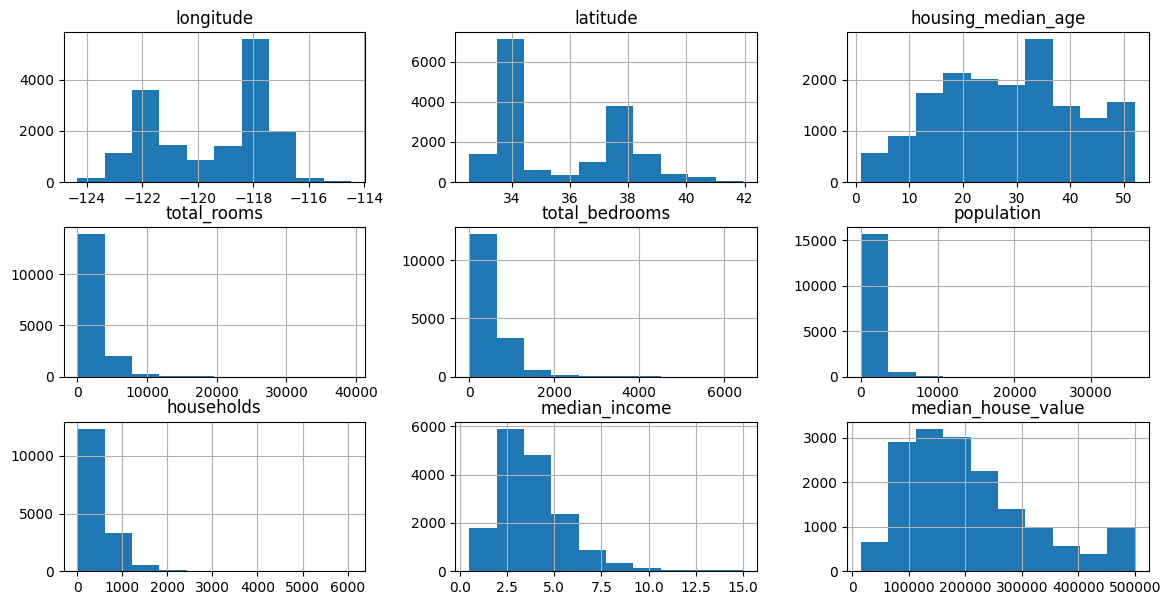

In [219]:
train_data.hist(figsize=(14,7))

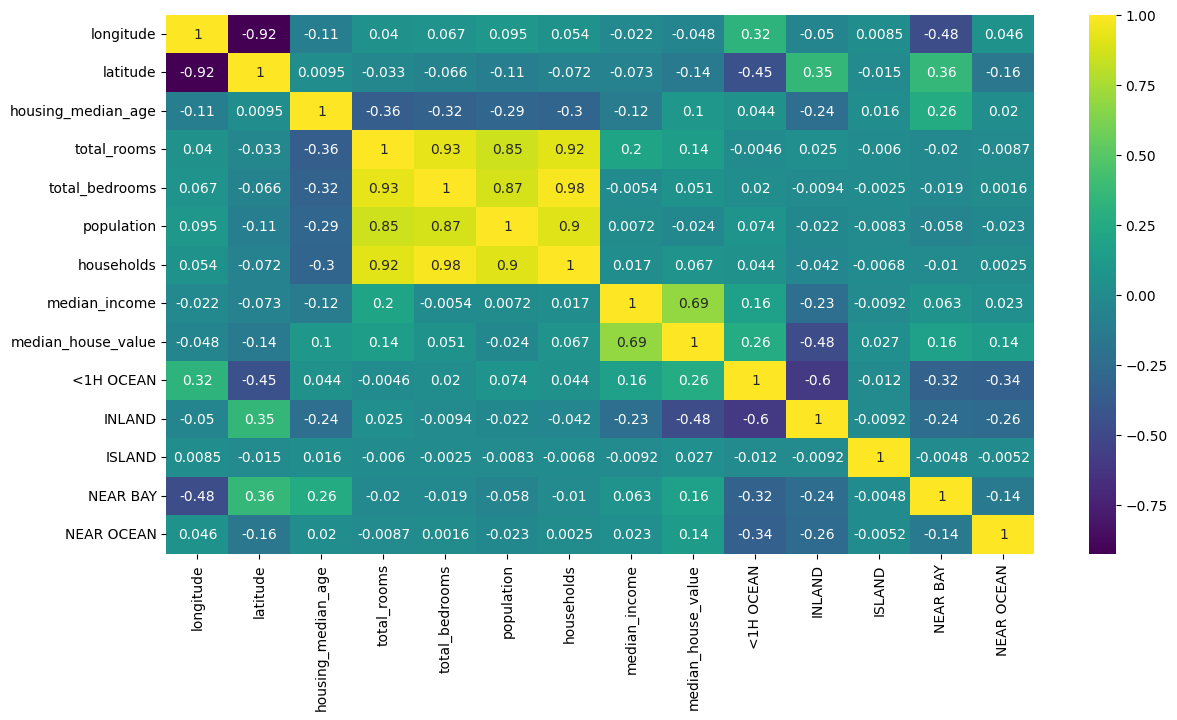

In [220]:
plt.figure(figsize=(14, 7)) 
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='viridis')
plt.show()

In [221]:
train_data["total_rooms"] = np.log(train_data["total_rooms"] + 1)
train_data["total_bedrooms"] = np.log(train_data["total_bedrooms"] + 1)
train_data["population"] = np.log(train_data["population"] + 1)
train_data["households"] = np.log(train_data["households"] + 1)

In [222]:
test_data["total_rooms"] = np.log(test_data["total_rooms"] + 1)
test_data["total_bedrooms"] = np.log(test_data["total_bedrooms"] + 1)
test_data["population"] = np.log(test_data["population"] + 1)
test_data["households"] = np.log(test_data["households"] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

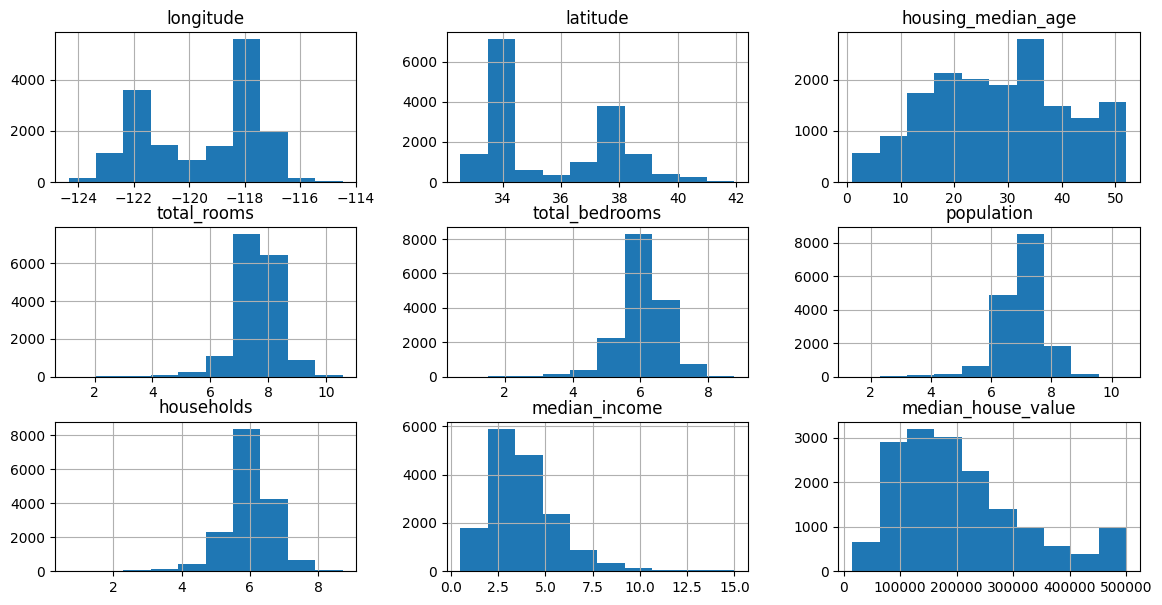

In [223]:
train_data.hist(figsize=(14,7))

<Axes: xlabel='latitude', ylabel='longitude'>

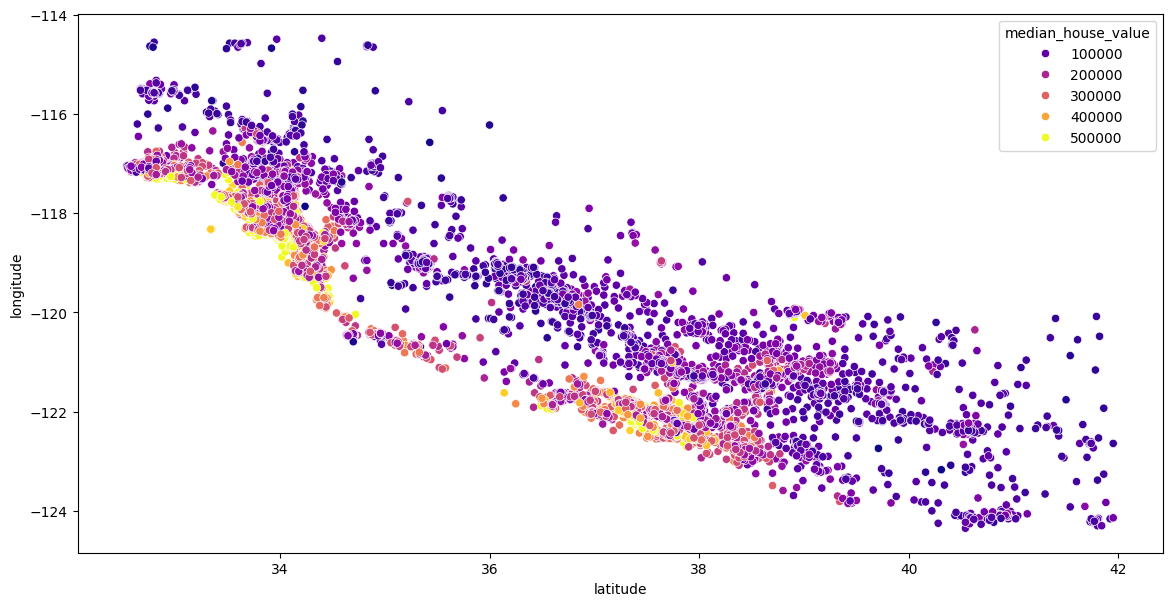

In [224]:
plt.figure(figsize=(14,7))
sns.scatterplot(x='latitude',y='longitude',data=train_data,hue="median_house_value",palette='plasma')

## Feature Engineering

In [225]:
train_data["bedrooms_ratio"] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data["total_rooms"] / train_data['households']

In [226]:
test_data["bedrooms_ratio"] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data["total_rooms"] / test_data['households']

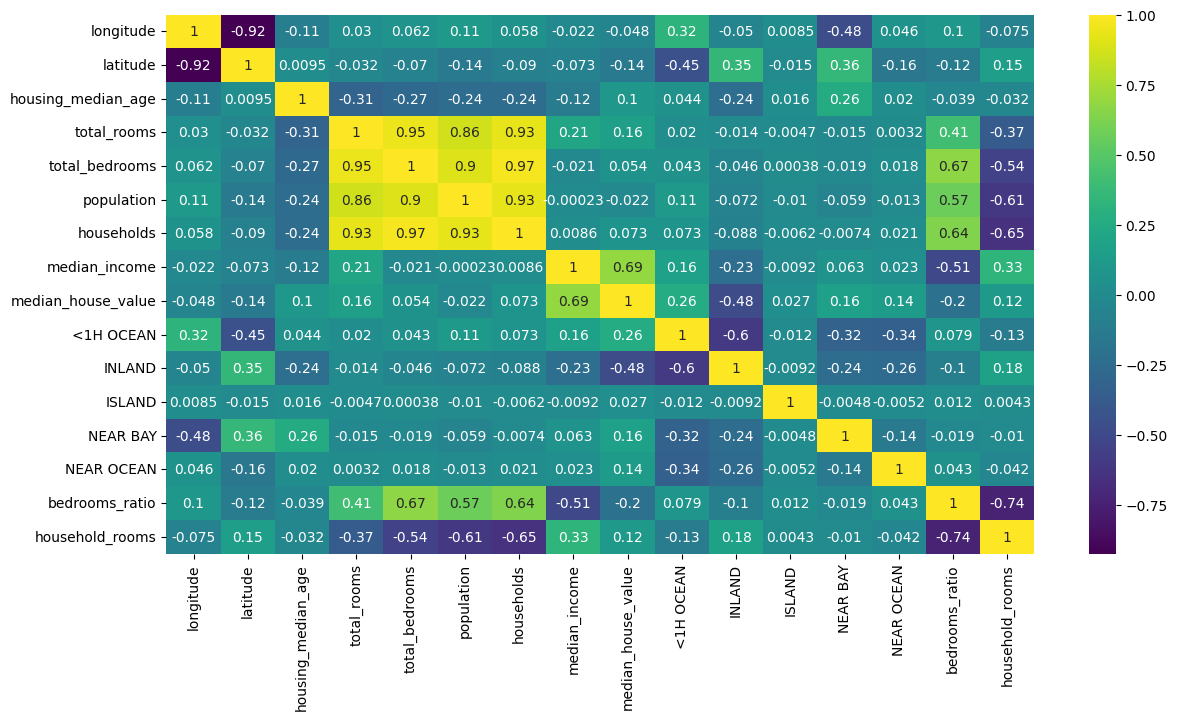

In [227]:
plt.figure(figsize=(14, 7)) 
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='viridis')
plt.show()

## Feature Scaling

In [228]:
X_train, y_train = train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']
X_test, y_test = test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [229]:
scaler = StandardScaler()

In [230]:
X_train = scaler.fit_transform(X_train)

In [231]:
X_test = scaler.fit_transform(X_test)

## Model Training & Evaluation

In [253]:
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    print(f"{name} -> R2: {r2:.4f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}")
    return r2

In [254]:
evaluate_model(LinearRegression(), "Linear Regression")

Linear Regression -> R2: 0.6692, RMSE: 67255.74, MAE: 48707.01


0.6692303774756763

In [255]:
evaluate_model(Ridge(alpha=1.0), "Ridge Regression")

Ridge Regression -> R2: 0.6693, RMSE: 67251.29, MAE: 48703.18


0.6692741379577567

In [256]:
evaluate_model(Lasso(alpha=0.01), "Lasso Regression")

Lasso Regression -> R2: 0.6693, RMSE: 67249.20, MAE: 48703.75


0.6692946989500661

In [257]:
evaluate_model(RandomForestRegressor(random_state=42), "Random Forest")

Random Forest -> R2: 0.7665, RMSE: 56502.60, MAE: 38744.20


0.7665446986148127

In [258]:
evaluate_model(GradientBoostingRegressor(random_state=42), "Gradient Boosting")

Gradient Boosting -> R2: 0.7504, RMSE: 58426.88, MAE: 40772.31


0.7503725790554945

In [259]:
evaluate_model(KNeighborsRegressor(n_neighbors=5), "KNN")

KNN -> R2: 0.7332, RMSE: 60407.54, MAE: 40465.82


0.733161087371154

## Model Selection

In [244]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2', 0.8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [245]:
search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_grid,
    n_iter=50,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

In [246]:
search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


,estimator,RandomForestR...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [1, 2, ...], ...}"
,n_iter,50
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [247]:
print("Best R2:", search.best_score_)

Best R2: 0.8150002096637594
